# Pandas ile veri manipulasyonu

## Pandas giris:  Dataframelerde temel manipulasyonlar: siralama, secme/filtreleme ve yeni kolon ekleme

In [1]:
import pandas as pd
satislar = pd.read_pickle("walmart_sales.pkl")
satislar.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


#### 1. min, max, mean, and median numpy istatistik fonksiyonlarini aggregate etmek: .agg([ _ , _ ,_ ])

In [2]:
import numpy as np

# her bir magaza turune gore, haftalik satislarin śu istatistiklerini aliniz:  min, max, mean, and median
satislar_istatistikler = satislar.groupby('type')['weekly_sales'].agg([np.min,np .max,np.mean,np.median])

# Print satislar_istatistikler
print(satislar_istatistikler)

# her bir magaza turune gore, unemployment ve fuel_price_usd_per_l degiskenlerine ait 
# śu istatistiklerini aliniz:  min, max, mean, and median
unemp_fuel_istatistikler = satislar.groupby('type')['unemployment','fuel_price_usd_per_l'].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_istatistikler
print(unemp_fuel_istatistikler)

         amin       amax          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67
     unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


#### 2. .pivot_table(values='column1', index='column2')

In [3]:
# Pivot tablo olusturunuz:  herbir magaza turune gore haftalik satis ortalamasini aliniz
tipe_gore_ort_satislar = satislar.pivot_table(values='weekly_sales', index='type')

# Print mean_sales_by_type
print(tipe_gore_ort_satislar)

      weekly_sales
type              
A     20099.568043
B     12335.331875
C      9519.532538


#### 3. .pivot_table(values='column1', index='column2', aggfunc=[np.mean, np.median])

In [4]:
# Yukaridaki kodu editleyip  np.mean ve np.median degerleri tabloda gosterilsin
tipe_gore_satislarin_ort_ve_median = satislar.pivot_table(values='weekly_sales',index='type', aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(tipe_gore_satislarin_ort_ve_median)

              mean       median
      weekly_sales weekly_sales
type                           
A     20099.568043     10105.17
B     12335.331875      6269.02
C      9519.532538      1149.67


#### 4. .pivot_table(values='column1', index='column2',  columns='column3')

In [5]:
# Yukaridaki kodu editleyip, columns olarak 'is_holiday' degiskenlerini yaziniz 
tip_ve_tatile_gore_satislar = satislar.pivot_table(values='weekly_sales', index='type', columns='is_holiday' )

# Print   tip_ve_tatile_gore_satislar
print(tip_ve_tatile_gore_satislar)

is_holiday         False         True 
type                                  
A           20008.746759  21297.517824
B           12248.741339  13478.844240
C            9518.528116   9532.963131


#### 5. .pivot_table(values='column1', index='column2',  columns='column3', fill_value=0)

In [6]:
# satislar uzerinde .pivot_table() uygulayiniz, tablo degerleri: haftalik satis ortalamasi, columns: magaza tipi,
# index: departman ve bos degerler: 0 olacak sekilde yaziniz
print(satislar.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0)[25:40])

type                   A             B             C
department                                          
27           1730.614921   1638.840966     19.715688
28            705.489549    699.362823     89.811128
29           5799.549360   5566.953724     13.208125
30           4232.884210   4043.370179      0.000000
31           2607.435351   2673.711993     58.397514
32           8181.957817   7070.457959     40.497581
33           6852.815966   6287.531399      6.785000
34          15844.116003  15610.432522      8.504400
35           3033.800262   2798.238086      7.000000
36           2065.022866   1987.526852      0.000000
37           3061.972555   3502.878746      0.000000
38          65005.018090  58617.330979  54641.271900
39              9.998667     28.000000      0.000000
40          53645.225607  42563.037635  20020.366434
41           1967.226170   1957.879996     44.380435


#### 6. .pivot_table(values='column1', index='column2',  columns='column3', fill_value=0, margins=True )

In [7]:
# satislar uzerinde .pivot_table() uygulayiniz, tablo degerleri: haftalik satis ortalamasi, columns: magaza tipi,
# index: departman ve bos degerler: 0 olacak sekilde, ve kolon ve satir toplamlari ile birlikte yaziniz
print(satislar.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0, margins=True))

type                   A             B             C           All
department                                                        
1           22956.887886  17990.876158   8951.733462  19213.485088
2           51994.674873  43051.996919  14424.851713  43607.020113
3           13881.033137  12965.414311    820.276818  11793.698516
4           32973.814075  21259.895804  13669.370396  25974.630238
5           26803.448045  21184.602916    767.600774  21365.583515
...                  ...           ...           ...           ...
96          19900.943552   4752.674874  15766.025431  15217.211505
97          22093.807101   3543.243304  13419.542809  14437.120839
98          10979.816195    299.951644   5479.758054   6973.013875
99            431.443064     25.716667      8.330952    415.487065
All         20099.568043  12335.331875   9519.532538  16094.726811

[82 rows x 4 columns]


## Dataframe indeksleri

In [8]:
temperatures = pd.read_csv("temperature.csv")
temperatures = temperatures[['month','day','year','City','Country','AverageTemperatureFahr']]
print(temperatures)

       month  day  year      City      Country  AverageTemperatureFahr
0          1    1  1853  Auckland  New Zealand                     NaN
1          2    1  1853  Auckland  New Zealand                     NaN
2          3    1  1853  Auckland  New Zealand                     NaN
3          4    1  1853  Auckland  New Zealand                     NaN
4          5    1  1853  Auckland  New Zealand                     NaN
...      ...  ...   ...       ...          ...                     ...
48465      5    1  2013   Wroclaw       Poland                 55.0544
48466      6    1  2013   Wroclaw       Poland                 61.1672
48467      7    1  2013   Wroclaw       Poland                 66.7706
48468      8    1  2013   Wroclaw       Poland                 64.5656
48469      9    1  2013   Wroclaw       Poland                     NaN

[48470 rows x 6 columns]


#### 7. .set_index('column')

In [9]:
#  City  degiskenini index yapiniz
temperatures_ind = temperatures.set_index('City')

# print  temperatures_ind
print(temperatures_ind)

          month  day  year      Country  AverageTemperatureFahr
City                                                           
Auckland      1    1  1853  New Zealand                     NaN
Auckland      2    1  1853  New Zealand                     NaN
Auckland      3    1  1853  New Zealand                     NaN
Auckland      4    1  1853  New Zealand                     NaN
Auckland      5    1  1853  New Zealand                     NaN
...         ...  ...   ...          ...                     ...
Wroclaw       5    1  2013       Poland                 55.0544
Wroclaw       6    1  2013       Poland                 61.1672
Wroclaw       7    1  2013       Poland                 66.7706
Wroclaw       8    1  2013       Poland                 64.5656
Wroclaw       9    1  2013       Poland                     NaN

[48470 rows x 5 columns]


#### 8. .reset_index()

In [10]:
# indexi resetleyiniz, fakat index bir degisken olarak kalsin
print(temperatures_ind.reset_index())    # islem kalici degil

           City  month  day  year      Country  AverageTemperatureFahr
0      Auckland      1    1  1853  New Zealand                     NaN
1      Auckland      2    1  1853  New Zealand                     NaN
2      Auckland      3    1  1853  New Zealand                     NaN
3      Auckland      4    1  1853  New Zealand                     NaN
4      Auckland      5    1  1853  New Zealand                     NaN
...         ...    ...  ...   ...          ...                     ...
48465   Wroclaw      5    1  2013       Poland                 55.0544
48466   Wroclaw      6    1  2013       Poland                 61.1672
48467   Wroclaw      7    1  2013       Poland                 66.7706
48468   Wroclaw      8    1  2013       Poland                 64.5656
48469   Wroclaw      9    1  2013       Poland                     NaN

[48470 rows x 6 columns]


#### 9. .reset_index(drop=True)

In [11]:
# indexi resetleyiniz,  index silinsin
print(temperatures_ind.reset_index(drop=True))    # islem kalici degil

       month  day  year      Country  AverageTemperatureFahr
0          1    1  1853  New Zealand                     NaN
1          2    1  1853  New Zealand                     NaN
2          3    1  1853  New Zealand                     NaN
3          4    1  1853  New Zealand                     NaN
4          5    1  1853  New Zealand                     NaN
...      ...  ...   ...          ...                     ...
48465      5    1  2013       Poland                 55.0544
48466      6    1  2013       Poland                 61.1672
48467      7    1  2013       Poland                 66.7706
48468      8    1  2013       Poland                 64.5656
48469      9    1  2013       Poland                     NaN

[48470 rows x 5 columns]


#### 10. .isin(ornek_liste)

In [12]:
cities = ['Auckland','Wroclaw']

# temperatures cities listesindekki isimlere gore filtreleyiniz
print(temperatures[temperatures['City'].isin(cities)])

# ayni islemi .loc[] ile yapiniz
print(temperatures_ind.loc[cities])    
# indekste bulunmali!   7 ve 10u pespese calistiriniz, ardindan 8 ve 10u calistiriniz

       month  day  year      City      Country  AverageTemperatureFahr
0          1    1  1853  Auckland  New Zealand                     NaN
1          2    1  1853  Auckland  New Zealand                     NaN
2          3    1  1853  Auckland  New Zealand                     NaN
3          4    1  1853  Auckland  New Zealand                     NaN
4          5    1  1853  Auckland  New Zealand                     NaN
...      ...  ...   ...       ...          ...                     ...
48465      5    1  2013   Wroclaw       Poland                 55.0544
48466      6    1  2013   Wroclaw       Poland                 61.1672
48467      7    1  2013   Wroclaw       Poland                 66.7706
48468      8    1  2013   Wroclaw       Poland                 64.5656
48469      9    1  2013   Wroclaw       Poland                     NaN

[5120 rows x 6 columns]
          month  day  year      Country  AverageTemperatureFahr
City                                                       

#### 11. Multiindex: .set_index(['var1','var2']

In [13]:
#  City ve Country degiskenlerini beraber index yapiniz (cift indeks)
temperatures_ind = temperatures.set_index(['Country','City'])

# ornek liste
rows_to_keep = [ ('Brazil','Rio De Janerio'),('Pakistan','Lahore') ]

# listeye gore seciniz
print(temperatures_ind.loc[rows_to_keep])

                        month  day    year  AverageTemperatureFahr
Country City                                                      
Brazil  Rio De Janerio    NaN  NaN     NaN                     NaN
NaN     NaN               5.0  1.0  1856.0                 55.4288
        NaN               6.0  1.0  1859.0                 54.3794
        NaN              12.0  1.0  1861.0                 64.2272
        NaN               1.0  1.0  1862.0                 64.2830
...                       ...  ...     ...                     ...
        NaN               9.0  1.0  1988.0                 56.1866
        NaN               7.0  1.0  1990.0                 61.5884
        NaN              12.0  1.0  1991.0                 29.4386
        NaN               8.0  1.0  1993.0                 61.4516
        NaN               3.0  1.0  1995.0                 36.2228

[485 rows x 4 columns]


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


#### 12. .sort_index()

In [14]:
# indekse gore siralayiniz
print(temperatures_ind.sort_index())

                  month  day  year  AverageTemperatureFahr
Country City                                              
Brazil  Brasília      1    1  1832                 71.3714
        Brasília      2    1  1832                 71.5532
        Brasília      3    1  1832                 71.1158
        Brasília      4    1  1832                 69.7226
        Brasília      5    1  1832                 68.2178
...                 ...  ...   ...                     ...
NaN     NaN           9    1  1988                 56.1866
        NaN           7    1  1990                 61.5884
        NaN          12    1  1991                 29.4386
        NaN           8    1  1993                 61.4516
        NaN           3    1  1995                 36.2228

[48470 rows x 4 columns]


#### 13. .sort_index(level='example_idx')

In [15]:
# cift indekli temperatures_ind i City indeksine gore siralayiniz
print(temperatures_ind.sort_index(level='City'))

                 month  day  year  AverageTemperatureFahr
Country City                                             
NaN     NaN          5    1  1856                 55.4288
        NaN          6    1  1859                 54.3794
        NaN         12    1  1861                 64.2272
        NaN          1    1  1862                 64.2830
        NaN         10    1  1871                 55.9292
...                ...  ...   ...                     ...
Poland  Wroclaw      5    1  2013                 55.0544
        Wroclaw      6    1  2013                 61.1672
        Wroclaw      7    1  2013                 66.7706
        Wroclaw      8    1  2013                 64.5656
        Wroclaw      9    1  2013                     NaN

[48470 rows x 4 columns]


#### 14. .sort_index(level=['idx1','idx2'], ascending=[True,False])

In [16]:
# cift indekli temperatures_ind i sirasiyla Country ve City indekslerine gore 
# sirasiyla kucukten buyuge ve buyukten kucuge siralayiniz
print(temperatures_ind.sort_index(level=['Country','City'], ascending=[True,False]))

                 month  day  year  AverageTemperatureFahr
Country City                                             
NaN     NaN          5    1  1856                 55.4288
        NaN          6    1  1859                 54.3794
        NaN         12    1  1861                 64.2272
        NaN          1    1  1862                 64.2830
        NaN         10    1  1871                 55.9292
...                ...  ...   ...                     ...
Ukraine Kherson      5    1  2013                 67.5176
        Kherson      6    1  2013                 72.0176
        Kherson      7    1  2013                 72.4496
        Kherson      8    1  2013                 73.1498
        Kherson      9    1  2013                     NaN

[48470 rows x 4 columns]


#### 15. cift indekste secme1: .loc[['ulke1','ulke2'],:]  

In [17]:
#  temperatures_ind i indekse gore siralayiniz
temperatures_srt = temperatures_ind.sort_index()

# Brazil ve France  i seciniz
print(temperatures_srt.loc[['Brazil','France'],:])

                  month  day  year  AverageTemperatureFahr
Country City                                              
Brazil  Brasília      1    1  1832                 71.3714
        Brasília      2    1  1832                 71.5532
        Brasília      3    1  1832                 71.1158
        Brasília      4    1  1832                 69.7226
        Brasília      5    1  1832                 68.2178
...                 ...  ...   ...                     ...
France  Paris         5    1  2013                 53.0654
        Paris         6    1  2013                 61.4120
        Paris         7    1  2013                 70.1348
        Paris         8    1  2013                 66.6230
        Paris         9    1  2013                     NaN

[10725 rows x 4 columns]


#### 16. cift indekste secme2: .loc[[('ulke1','ulke2'),('sehir1','sehir2')],:]

In [18]:
# Bu sekilde secme bos doner
print(temperatures_srt.loc[['Brasília','Paris'],:]) 

Empty DataFrame
Columns: [month, day, year, AverageTemperatureFahr]
Index: []


In [19]:
# Yukaridaki sehir secimini dogru kod ile yapiniz 
print(temperatures_srt.loc[[('Brazil','Brasília'),('France','Paris')],:])    

                  month  day  year  AverageTemperatureFahr
Country City                                              
Brazil  Brasília      1    1  1832                 71.3714
        Brasília      2    1  1832                 71.5532
        Brasília      3    1  1832                 71.1158
        Brasília      4    1  1832                 69.7226
        Brasília      5    1  1832                 68.2178
...                 ...  ...   ...                     ...
France  Paris         5    1  2013                 53.0654
        Paris         6    1  2013                 61.4120
        Paris         7    1  2013                 70.1348
        Paris         8    1  2013                 66.6230
        Paris         9    1  2013                     NaN

[5366 rows x 4 columns]


#### 17. df[ (df["var"] >= 5) & (df["var"] < 10) ]

In [20]:
# year degiskeni uzerinde islem yaparak 2010 den 2011 e kadar olan gozlemleri yazdiriniz
print(temperatures[(temperatures["year"] >= 2010) & (temperatures["year"] < 2012)])

       month  day  year      City      Country  AverageTemperatureFahr
1884       1    1  2010  Auckland  New Zealand                 66.2864
1885       2    1  2010  Auckland  New Zealand                 69.6866
1886       3    1  2010  Auckland  New Zealand                 66.2972
1887       4    1  2010  Auckland  New Zealand                 63.0824
1888       5    1  2010  Auckland  New Zealand                 60.0332
...      ...  ...   ...       ...          ...                     ...
48444      8    1  2011   Wroclaw       Poland                 64.8536
48445      9    1  2011   Wroclaw       Poland                 59.2196
48446     10    1  2011   Wroclaw       Poland                 47.6726
48447     11    1  2011   Wroclaw       Poland                 38.6870
48448     12    1  2011   Wroclaw       Poland                 36.2732

[432 rows x 6 columns]


#### 18. df.pivot_table("var", index=['var1','var2'], columns="var3")

In [21]:
# pivot_table fonk ile sicaklik ortalamalarini (AverageTemperatureFahr) yazdiriniz:  index olarak  country ve city   column olarak  year aliniz 
temp_by_country_city_vs_year = temperatures.pivot_table("AverageTemperatureFahr", index=['Country','City'], columns="year").iloc[:,:5]

# ilk 5 kolonu secerek sonuc:
print(temp_by_country_city_vs_year)

year                          1743       1744      1745       1750       1751
Country      City                                                            
Brazil       Brasília          NaN        NaN       NaN        NaN        NaN
             Canoas            NaN        NaN       NaN        NaN        NaN
France       Marseille     56.9426  61.072700  49.93880  60.251000  60.430100
             Paris         45.7664  52.663550  40.51220  52.116636  52.074950
Japan        Tokyo             NaN        NaN       NaN        NaN        NaN
             Tottori           NaN        NaN       NaN        NaN        NaN
New Zealand  Auckland          NaN        NaN       NaN        NaN        NaN
             Hamilton          NaN        NaN       NaN        NaN        NaN
Poland       Warsaw        38.1740  46.621143  29.71445  46.889764  46.805225
             Wroclaw       40.0892  48.134525  31.28450  46.663945  46.607000
South Africa Cape Town         NaN        NaN       NaN        N

#### 19. 

In [22]:
# cift indeksli olan bir ustteki dataframe uzerinde France ten Japan a kadar yazdiriniz
print(temp_by_country_city_vs_year.loc['France':'Japan'])

year                  1743      1744     1745       1750      1751
Country City                                                      
France  Marseille  56.9426  61.07270  49.9388  60.251000  60.43010
        Paris      45.7664  52.66355  40.5122  52.116636  52.07495
Japan   Tokyo          NaN       NaN      NaN        NaN       NaN
        Tottori        NaN       NaN      NaN        NaN       NaN


In [23]:
# cift indeksli olan bir ustteki dataframe uzerinde  France, Paris   ten   New Zealand, Hamilton  e kadar yazdiriniz
print(temp_by_country_city_vs_year.loc[('France','Paris'):('New Zealand','Hamilton')])

year                     1743      1744     1745       1750      1751
Country     City                                                     
France      Paris     45.7664  52.66355  40.5122  52.116636  52.07495
Japan       Tokyo         NaN       NaN      NaN        NaN       NaN
            Tottori       NaN       NaN      NaN        NaN       NaN
New Zealand Auckland      NaN       NaN      NaN        NaN       NaN
            Hamilton      NaN       NaN      NaN        NaN       NaN


In [24]:
# ustteki hucredeki islemi ve 1744 ile 1750 yillari arasini seciniz
print(temp_by_country_city_vs_year.loc[('France','Paris'):('New Zealand','Hamilton'),1744:1750])

year                      1744     1745       1750
Country     City                                  
France      Paris     52.66355  40.5122  52.116636
Japan       Tokyo          NaN      NaN        NaN
            Tottori        NaN      NaN        NaN
New Zealand Auckland       NaN      NaN        NaN
            Hamilton       NaN      NaN        NaN


## DataFrameler uzerinde gorsellestirme ve bazi islemler

In [25]:
avocados = pd.read_pickle("avoplotto.pkl")
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


#### 20. .plot(kind='bar')

In [26]:
#  matplotlib.pyplot i plt diye  import ediniz  
import matplotlib.pyplot as plt

# avocados dfsinin ilk gozlemlerine bakalim
print(avocados.head())

#  "size"  degiskenine gore guruplayip  her gurup icin nb_sold degiskeninin toplamini kaydediniz (kac tane satildigi): nb_sold_by_size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# nb_sold_by_size  uzerinde bar turu grafik olusturunuz
nb_sold_by_size.plot(kind='bar')

# graf i gorelim
plt.show()

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


<Figure size 640x480 with 1 Axes>

#### 21. .plot(kind='line', x='var1', y='var2')

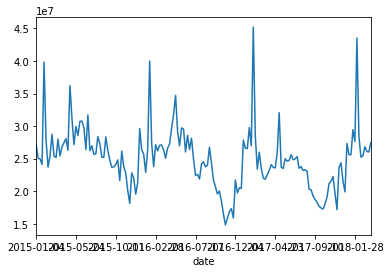

In [27]:
# date e gore guruplayip her gurup icin nb_sold degiskenin toplamini kaydediniz:  nb_sold_by_date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# nb_sold_by_date  uzerinde line grafigi olusturunuz, x ekseni date, y ekseni nb_sold seciniz
nb_sold_by_date.plot(kind='line', x='date', y='nb_sold')

# graf i gorelim
plt.show()

#### 22. .plot(kind='scatter', x='var1', y='var2', title='Baslik...')

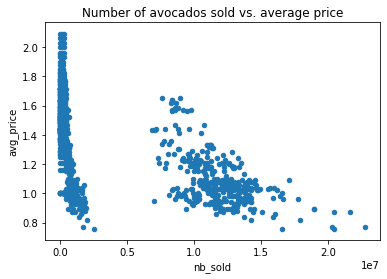

In [28]:
# avocados uzerinde scatter graf uygulayiniz, x ekseni icin nb_sold,  y ekseni icin avg_price i seciniz 
# bir baslik atiniz
avocados.plot(kind='scatter', x='nb_sold', y='avg_price', 
            title='Number of avocados sold vs. average price')

# graf i gosteriniz
plt.show()

#### 23.a  df1.hist(); df2.hist(): plt.legend(['lgnd1','lgnd2']); plt.show()

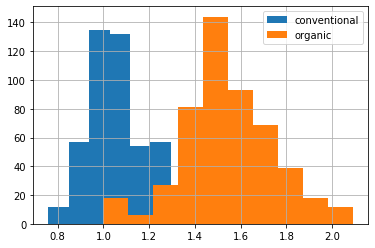

In [29]:
# tipi conventional olan gozlemleri filtreleyiniz,  avg_price  degiskeni uzerinde Histogram graf olusturunuz
avocados[avocados['type']=='conventional']['avg_price'].hist()

# ayni grafi tipi organic olanlar icin de olusturunuz
avocados[avocados['type']=='organic']['avg_price'].hist()

#  legend  ekleyiniz
plt.legend(['conventional','organic'])

# graf i gosteriniz
plt.show()

#### 23.b alpha= ve bins=

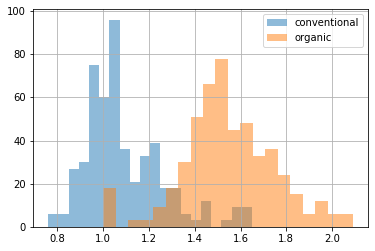

In [30]:
# yukarindaki her iki grafige 0.5 seffaflik ve 20 bins ekleyiniz
avocados[avocados['type']=='conventional']['avg_price'].hist(alpha=0.5,  bins=20)
avocados[avocados['type']=='organic']['avg_price'].hist(alpha=0.5, bins=20)

plt.legend(['conventional','organic'])

plt.show()

#### 24. Missing values (NaN: Not Any Number) isna(), isna().any() ve .plot(kind='bar')

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         False
type         False
year         False
avg_price     True
size          True
nb_sold       True
dtype: bool


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

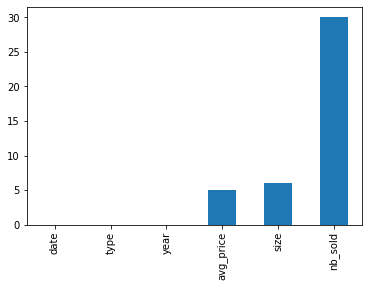

In [31]:
avocados_2016 = avocados[avocados['year']==2016].copy()
avocados_2016['size'][10:16] = np.NaN
avocados_2016['avg_price'][20:25] = np.NaN
avocados_2016['nb_sold'][30:60] = np.NaN

# avocados_2016 a her bir gozlem degerleri icin  eksik deger sorgulamasi yapip yazdiriniz
print(avocados_2016.isna())

# avocados_2016 a her bir degisken icin eksik deger sorgulamasi yapip yazdiriniz
print(avocados_2016.isna().any())

# eksik gozlemleri degiskenler bazindaki sayilarin toplami uzerinde bar graf  olusturunuz
avocados_2016.isna().sum().plot(kind='bar')

# graf i yazdiriniz
plt.show()

#### 25. .dropna()

In [32]:
# .dropna()  ile eksik degerli gozlemleri atiniz
avocados_complete = avocados_2016.dropna()

# degisken bazinda eksik gozlem sorgusu yapiniz
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


#### 26. eksik gozlemli hali vs eksik gozlemi olmayan df nin histogram degisimi 

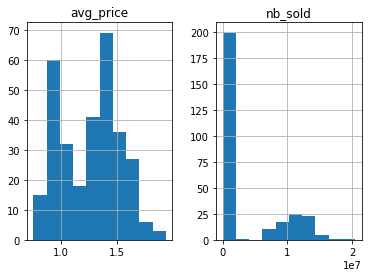

In [33]:
#  eksik veriye sahip degiskenler
cols_with_missing = ["avg_price", "nb_sold"]   # size  kategorik turde

# bu listeye gore filtreleyiniz,  ve histogram grafigi ile dagilimi gorelim
avocados_2016[cols_with_missing].hist()

# graf show
plt.show()

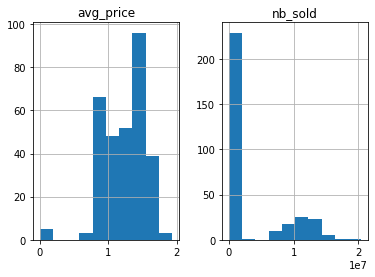

In [34]:
# eksik degerleri 0 ile doldurunuz
avocados_filled = avocados_2016.fillna(0)

# doldurulmus halinin dagilimi histogram ile gorelim
avocados_filled[cols_with_missing].hist()

# Show  graf
plt.show()

## DataFrame i csv dosyasi olarak kaydetme 

In [35]:
avocados_filled.to_csv("avocados_filled.csv")